In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.layers import Dropout
import keras

Using TensorFlow backend.


In [10]:
dataset = read_csv("dataset.csv")
dataset_ = dataset[["time", "na_entry"]]

#scale and normalize data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(dataset_)
dataset_scaled = scaler.transform(dataset_)
data_naive = pd.DataFrame(dataset_scaled)

data_frame = concat([data_naive.shift(1), data_naive], axis=1)
data_frame.columns = ['t1', 't2', "na1", "na2"]
dataframe = data_frame[["t2","na2"]]

# split into train and test sets
X = dataframe.values
train_size = 1520
val_size = 1620
train, validation, test = X[1:train_size], X[train_size:val_size], X[val_size:]
train_X, train_y = train[:,0], train[:,1]
val_X, val_y = validation[:,0], validation[:,1]
test_X, test_y = test[:,0], test[:,1]



Test MSE: 0.078


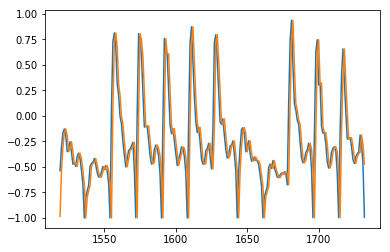

In [2]:
#Create a base model to measure performance (naive model)



# Naive Model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 
# plot predictions and expected results
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [12]:
# MLP Model

dataset = read_csv("dataset.csv")
dataset=dataset[["na_entry", "time", "weekday", "holiday", "days"]]


dataset["na_entry_lag"]=dataset["na_entry"].shift(1)
dataset = dataset[1:]

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(dataset)
dataset_scaled = scaler.transform(dataset)

train_size = 1520
val_size = 1620
train, validation, test = dataset_scaled[1:train_size], dataset_scaled[train_size:val_size], dataset_scaled[val_size:]
train_X, train_y = train[:,1:], train[:,0]
val_X, val_y = validation[:,1:], validation[:,0]
test_X, test_y = test[:,1:], test[:,0]

#inverse scale
#scaler.inverse_transform(dataset_scaled)

def fit_model(train_X, train_y, test_X, test_y, epochs):
    model = Sequential()
    model.add(Dense(6, activation='relu', input_dim=train_X.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    adam = keras.optimizers.Adam(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.005, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer= adam, metrics=['mse'])
    history = model.fit(train_X, train_y, epochs=epochs, 
              batch_size=32, validation_data=(test_X, test_y), 
              verbose=2, shuffle=True)
    
    return model, history

In [21]:
dataset = read_csv("dataset.csv")
dataset=dataset[["na_entry", "time", "weekday", "holiday", "days"]]


dataset["na_entry_lag"]=dataset["na_entry"].shift(1)
dataset = dataset[1:]

dataset.head(50)

,na_entry,time,weekday,holiday,days,na_entry_lag
1,689,7,6,1.0,1,418.0
2,926,8,6,1.0,1,689.0
3,1283,9,6,1.0,1,926.0
4,1903,10,6,1.0,1,1283.0
5,2470,11,6,1.0,1,1903.0
6,2193,12,6,1.0,1,2470.0
7,2228,13,6,1.0,1,2193.0
8,2215,14,6,1.0,1,2228.0
9,1982,15,6,1.0,1,2215.0
10,1993,16,6,1.0,1,1982.0


In [4]:
# Fit MLP Model
final_model, history = fit_model(train_X, train_y, val_X, val_y, 2500)

results = final_model.predict(val_X)
print('Validation MSE: %.3f' % mean_squared_error(val_y, results))

Train on 1519 samples, validate on 100 samples
Epoch 1/2500
 - 0s - loss: 0.1515 - mean_squared_error: 0.1515 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 2/2500
 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 3/2500
 - 0s - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 4/2500
 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 5/2500
 - 0s - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 6/2500
 - 0s - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 7/2500
 - 0s - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 8/2500
 - 0s - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 9/2500
 - 0s - loss: 0.0677

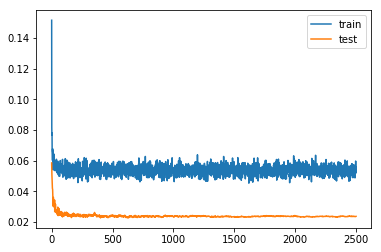

In [5]:
# Plot training and validation performance

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [6]:
# Final Test MSE
stored_results = final_model.predict(test_X)
print("Test Mse: %.3f" % mean_squared_error(test_y, stored_results))

Test Mse: 0.019


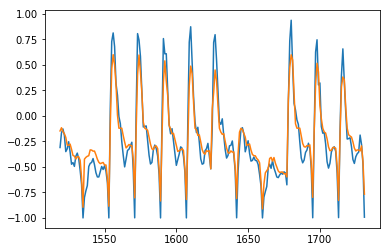

In [7]:
# Compare Predicted values to True Valuse of test set
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in stored_results])
plt.show()

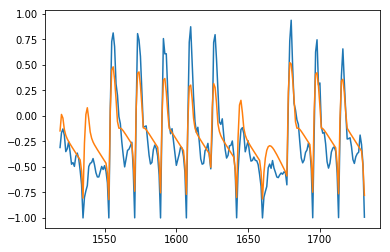

In [8]:
# Testing: Multi-step Prediction

import numpy as np
inputs = test_X[:,:-1]
X_input = test_X[:,4:][0]

def predict_multi_step(model, X, inputs):
    predicts = list()
    predicts.append(X)
    
    for i in range(len(inputs)):
        test = np.append(inputs[i], predicts[i])
        forecast_val = model.predict(np.expand_dims(test, axis=0))
        predicts.append(forecast_val)
        
    return predicts[1:]
        
predictions = predict_multi_step(final_model, X_input, inputs)

plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()